# Khám phá dữ liệu trên tập dữ liệu về phân loại chất lượng rượu đỏ

## 1. Chuẩn bị dữ liệu

In [33]:
import pandas as pd 
wine_data = pd.read_csv("winequality-red.csv")
wine_data = wine_data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']]


In [34]:
from IPython.display import display
display(wine_data.head(10).style.background_gradient(cmap='YlOrRd'))


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
1,7.800000,0.880000,0.000000,2.600000,0.098000,25.000000,67.000000,0.996800,3.200000,0.680000,9.800000,5
2,7.800000,0.760000,0.040000,2.300000,0.092000,15.000000,54.000000,0.997000,3.260000,0.650000,9.800000,5
3,11.200000,0.280000,0.560000,1.900000,0.075000,17.000000,60.000000,0.998000,3.160000,0.580000,9.800000,6
4,7.400000,0.700000,0.000000,1.900000,0.076000,11.000000,34.000000,0.997800,3.510000,0.560000,9.400000,5
5,7.400000,0.660000,0.000000,1.800000,0.075000,13.000000,40.000000,0.997800,3.510000,0.560000,9.400000,5
6,7.900000,0.600000,0.060000,1.600000,0.069000,15.000000,59.000000,0.996400,3.300000,0.460000,9.400000,5
7,7.300000,0.650000,0.000000,1.200000,0.065000,15.000000,21.000000,0.994600,3.390000,0.470000,10.000000,7
8,7.800000,0.580000,0.020000,2.000000,0.073000,9.000000,18.000000,0.996800,3.360000,0.570000,9.500000,7
9,7.500000,0.500000,0.360000,6.100000,0.071000,17.000000,102.000000,0.997800,3.350000,0.800000,10.500000,5


## 2. Loại bỏ dữ liệu trùng lặp

Trước hết, chúng ta cần kiểm tra xem có dữ liệu trùng lặp hay không

In [35]:
duplicate_count = wine_data.duplicated().sum()
print(f"Số dòng bị trùng lặp: {duplicate_count}")

# Hiển thị các dòng bị trùng lặp
duplicated_rows = wine_data[wine_data.duplicated(keep=False)]
print("Các dòng bị trùng lặp:")
display(duplicated_rows)


Số dòng bị trùng lặp: 240
Các dòng bị trùng lặp:


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


Sau khi kiểm tra, ta nhận thấy có rất nhiều dòng dữ liệu trùng lặp, nên chúng ta sẽ thực hiện loại bỏ (ở đây có 240 dòng dữ liệu trùng lặp)

In [36]:
wine_data.head()
wine_data = wine_data.drop_duplicates()


## 3. Thay thế dữ liệu thiếu, thay đổi định dạng của dữ liệu

Trước hết, cần kiểm tra định dạng của bộ dữ liệu 

In [37]:
wine_data_info = wine_data.dtypes
wine_data_info


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

Sau khi kiểm tra, ta nhận thấy các định dạng đều đồng nhất, và không có vấn đề gì, nên ta bỏ qua bước này. Tiếp theo chúng ta sẽ kiểm tra xem bộ dữ liệu này có bị thiếu hay không (kiêm tra xem bộ nào không có dữ liệu từng cột, hoặc dữ liệu = 0)

In [38]:
missing_info = wine_data.isnull().sum()
missing_info


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Dựa vào kết quả kiểm tra này, ta kết luận bộ dữ liệu này đã đồng nhất về định dạng, và không có dữ liệu bị thiếu.

## 4. Tính toán và thống kê mô tả 

Tới đây, ta sẽ thống kê mô tả bộ dữ liệu này.

In [39]:
import numpy as np
from scipy import stats

# Tính toán các thống kê mô tả cho từng cột số liệu
desc_stats = {}

for col in wine_data.columns:
    if wine_data[col].dtype in [np.float64, np.int64]:
        data = wine_data[col].values
        
        mean = np.mean(data)
        median = np.median(data)
        mode = stats.mode(data, keepdims=True)[0][0]
        var = np.var(data, ddof=1)
        std = np.std(data, ddof=1)
        data_range = np.ptp(data)
        percentile_25 = np.percentile(data, 25)
        percentile_50 = np.percentile(data, 50)
        percentile_75 = np.percentile(data, 75)
        iqr = stats.iqr(data)
        
        desc_stats[col] = {
            'mean': mean,
            'median': median,
            'mode': mode,
            'variance': var,
            'std_dev': std,
            'range': data_range,
            'percentile_25': percentile_25,
            'percentile_50': percentile_50,
            'percentile_75': percentile_75,
            'iqr': iqr
        }

desc_stats_df = pd.DataFrame(desc_stats).T
desc_stats_df


,mean,median,mode,variance,std_dev,range,percentile_25,percentile_50,percentile_75,iqr
fixed acidity,8.310596,7.9000,7.2000,3.017134,1.736990,11.30000,7.1000,7.9000,9.20000,2.10000
volatile acidity,0.529478,0.5200,0.5000,0.033500,0.183031,1.46000,0.3900,0.5200,0.64000,0.25000
citric acid,0.272333,0.2600,0.0000,0.038235,0.195537,1.00000,0.0900,0.2600,0.43000,0.34000
residual sugar,2.523400,2.2000,2.0000,1.828752,1.352314,14.60000,1.9000,2.2000,2.60000,0.70000
chlorides,0.088124,0.0790,0.0800,0.002438,0.049377,0.59900,0.0700,0.0790,0.09100,0.02100
free sulfur dioxide,15.893304,14.0000,6.0000,109.145456,10.447270,71.00000,7.0000,14.0000,21.00000,14.00000
total sulfur dioxide,46.825975,38.0000,28.0000,1116.157653,33.408946,283.00000,22.0000,38.0000,63.00000,41.00000
density,0.996709,0.9967,0.9968,0.000003,0.001869,0.01362,0.9956,0.9967,0.99782,0.00222
pH,3.309787,3.3100,3.3000,0.024036,0.155036,1.27000,3.2100,3.3100,3.40000,0.19000
sulphates,0.658705,0.6200,0.5400,0.029127,0.170667,1.67000,0.5500,0.6200,0.73000,0.18000


### Quan sát bảng thống kê này, ta có thể thấy: 

- Giá trị trung bình của **fixed acidity** là 8.31, giá trị cao nhất là 15.9
- Giá trị trung bình của **volatile acidity** là 0.53, giá trị cao nhất là 1.58
- Giá trị trung bình của **citric acid** là 0.27, giá trị cao nhất là 1.00
- Giá trị trung bình của **residual sugar** là 2.52, giá trị cao nhất là 15.5
- Giá trị trung bình của **chlorides** là 0.09, giá trị cao nhất là 0.60
- Giá trị trung bình của **free sulfur dioxide** là 15.89, giá trị cao nhất là 72.0
- Giá trị trung bình của **total sulfur dioxide** là 46.83, giá trị cao nhất là 283.0
- Giá trị trung bình của **density** là 0.997, giá trị cao nhất là 1.01
- Giá trị trung bình của **pH** là 3.31, giá trị cao nhất là 4.01
- Giá trị trung bình của **sulphates** là 0.66, giá trị cao nhất là 2.00
- Giá trị trung bình của **alcohol** là 10.43, giá trị cao nhất là 14.90
- Giá trị trung bình của **quality** là 5.62, giá trị cao nhất là 8

Tư kết quả này, ta có thể sử dụng chúng để thực các công việc tiếp theo (như trực quan hóa dữ liệu, xử lý ngoại lai, ...)

## 5. Trực quan hóa dữ liệu

### 5.1. Phân tích đơn tính chất

Chúng ta sẽ sử dụng biểu đồ trực quan, để biểu diễn các giá trị có trong bộ dữ liệu và từ đó có được nhận xét chung về bộ dữ liệu.

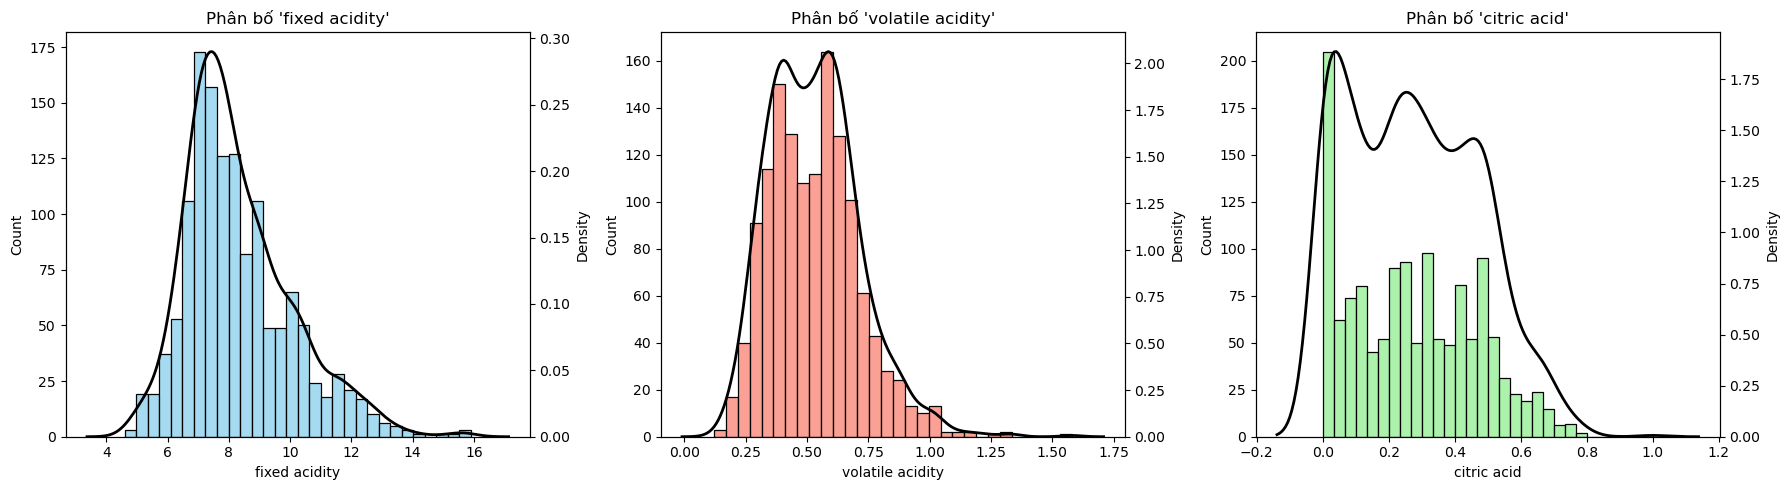

In [40]:
import seaborn as sns

import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

features = ['fixed acidity', 'volatile acidity', 'citric acid']
colors = ['skyblue', 'salmon', 'lightgreen']

for ax, feature, color in zip(axes, features, colors):
    sns.histplot(wine_data[feature], bins=30, kde=False, color=color, ax=ax)
    ax2 = ax.twinx()
    sns.kdeplot(wine_data[feature], color='black', ax=ax2, linewidth=2)
    ax.set_title(f"Phân bố '{feature}'")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax2.set_ylabel("Density")

plt.tight_layout()
plt.show()


### Nhận xét phân bố tổng quát cho các thuộc tính fixed acidity, volatile acidity, citric acid

- **Fixed acidity**: Phân bố của thuộc tính này có xu hướng tập trung quanh giá trị trung bình, với phần lớn các mẫu nằm trong khoảng từ 7 đến 9. Có một số giá trị ngoại lai ở hai phía, nhưng đa số dữ liệu phân bố khá đều và không quá lệch.

- **Volatile acidity**: Biểu đồ cho thấy phần lớn giá trị tập trung ở khoảng 0.4 đến 0.7, với đỉnh phân bố rõ rệt. Phân bố này hơi lệch về phía phải, cho thấy có một số mẫu có độ axit bay hơi cao hơn mức trung bình.

- **Citric acid**: Đa số giá trị của citric acid nằm ở mức thấp (gần 0), với số lượng mẫu giảm dần khi giá trị tăng lên. Phân bố này lệch phải rõ rệt, cho thấy phần lớn rượu có hàm lượng acid citric thấp, chỉ một số ít mẫu có giá trị cao hơn.

Nhìn chung, cả ba thuộc tính đều có xu hướng phân bố không đối xứng, với fixed acidity gần như chuẩn, volatile acidity và citric acid lệch phải. Điều này phản ánh đặc điểm hóa học phổ biến của rượu vang đỏ trong tập dữ liệu.


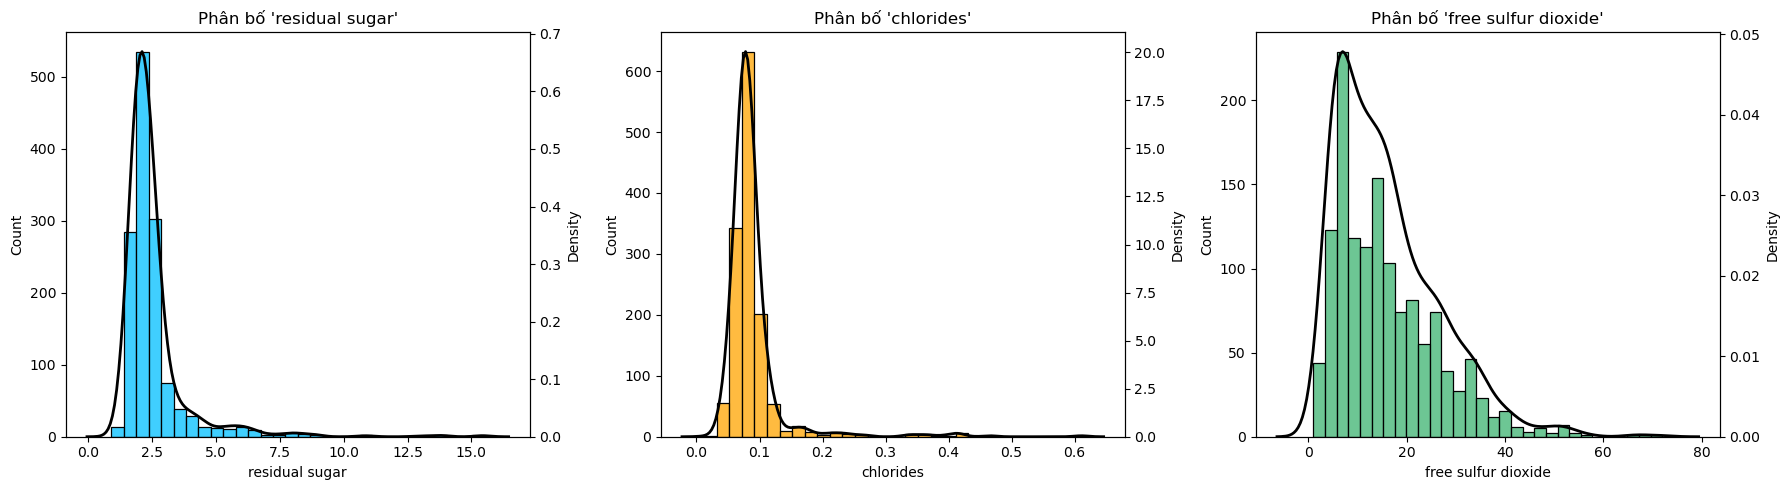

In [41]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

features = ['residual sugar', 'chlorides', 'free sulfur dioxide']
colors = ['deepskyblue', 'orange', 'mediumseagreen']

for ax, feature, color in zip(axes, features, colors):
    sns.histplot(wine_data[feature], bins=30, kde=False, color=color, ax=ax)
    ax2 = ax.twinx()
    sns.kdeplot(wine_data[feature], color='black', ax=ax2, linewidth=2)
    ax.set_title(f"Phân bố '{feature}'")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax2.set_ylabel("Density")

plt.tight_layout()
plt.show()


### Nhận xét phân bố tổng quát cho các thuộc tính residual sugar, chlorides, free sulfur dioxide

- **Residual sugar**: Phân bố của thuộc tính này tập trung chủ yếu ở mức thấp (khoảng 2-3), với số lượng mẫu giảm nhanh khi giá trị tăng lên. Điều này cho thấy phần lớn rượu vang đỏ trong tập dữ liệu có lượng đường dư thấp, chỉ một số ít mẫu có giá trị cao hơn.

- **Chlorides**: Đa số giá trị chlorides nằm ở mức thấp (dưới 0.1), phân bố lệch phải rõ rệt. Số lượng mẫu giảm mạnh khi giá trị tăng, phản ánh đặc điểm hóa học phổ biến là hàm lượng chloride thấp trong rượu vang đỏ.

- **Free sulfur dioxide**: Phân bố của thuộc tính này cũng tập trung ở mức thấp (dưới 20), với một số mẫu có giá trị cao hơn nhưng không nhiều. Phân bố lệch phải, cho thấy phần lớn rượu vang đỏ có lượng SO₂ tự do thấp, chỉ một số ít mẫu có giá trị cao.

Nhìn chung, cả ba thuộc tính đều có phân bố lệch phải, tập trung ở các giá trị thấp, phản ánh đặc điểm hóa học phổ biến của rượu vang đỏ trong tập dữ liệu này.

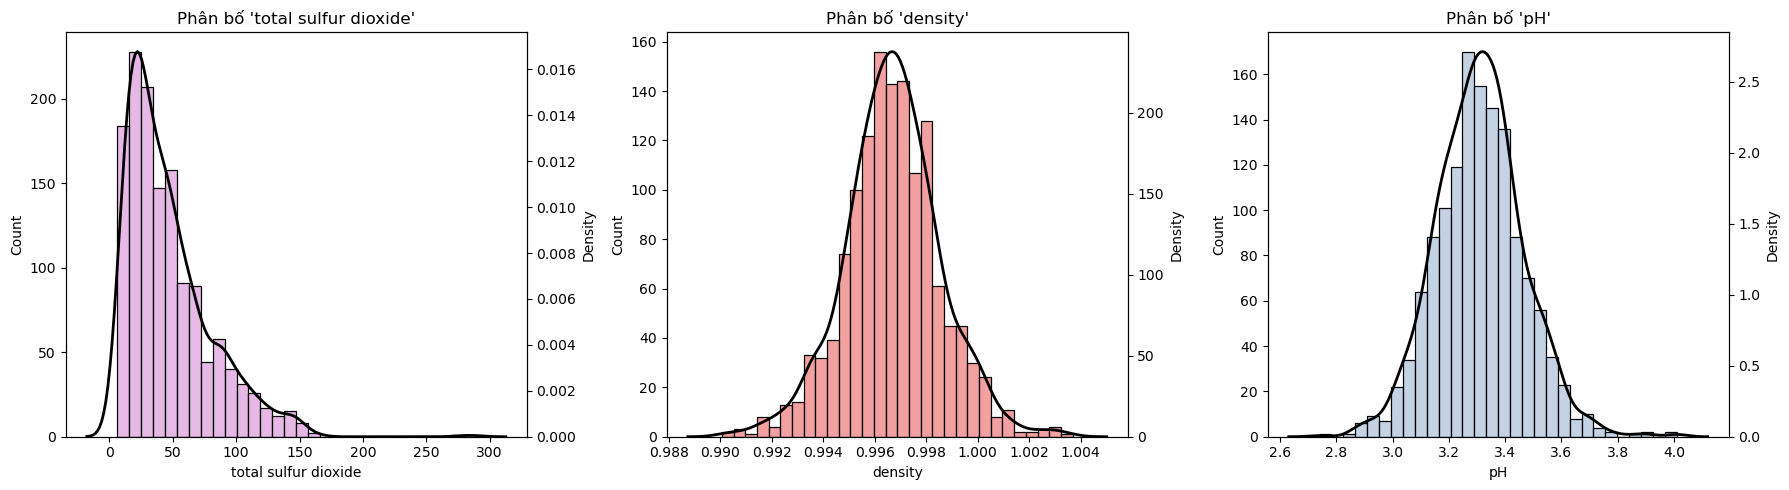

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

features = ['total sulfur dioxide', 'density', 'pH']
colors = ['plum', 'lightcoral', 'lightsteelblue']

for ax, feature, color in zip(axes, features, colors):
	sns.histplot(wine_data[feature], bins=30, kde=False, color=color, ax=ax)
	ax2 = ax.twinx()
	sns.kdeplot(wine_data[feature], color='black', ax=ax2, linewidth=2)
	ax.set_title(f"Phân bố '{feature}'")
	ax.set_xlabel(feature)
	ax.set_ylabel("Count")
	ax2.set_ylabel("Density")

plt.tight_layout()
plt.show()


### Nhận xét phân bố tổng quát cho các thuộc tính total sulfur dioxide, density, pH

- **Total sulfur dioxide**: Phân bố của thuộc tính này lệch phải rõ rệt, phần lớn các mẫu tập trung ở mức thấp (dưới 60), nhưng vẫn có một số mẫu có giá trị rất cao, tạo ra đuôi dài bên phải. Điều này cho thấy đa số rượu vang đỏ có hàm lượng SO₂ tổng thấp, chỉ một số ít mẫu có giá trị vượt trội.

- **Density**: Phân bố density khá tập trung quanh giá trị trung bình (~0.9967), với phần lớn các mẫu nằm trong khoảng hẹp. Biểu đồ cho thấy mật độ rượu vang đỏ trong tập dữ liệu này khá đồng nhất, không có nhiều giá trị ngoại lai.

- **pH**: Phân bố pH cũng tập trung quanh giá trị trung bình (~3.31), với phần lớn các mẫu nằm trong khoảng từ 3.2 đến 3.4. Phân bố này khá chuẩn, không quá lệch, phản ánh độ axit của rượu vang đỏ trong tập dữ liệu chủ yếu nằm ở mức trung bình.

Nhìn chung, cả ba thuộc tính đều có xu hướng tập trung ở các giá trị phổ biến, riêng total sulfur dioxide có đuôi phân bố dài về phía giá trị lớn, density và pH phân bố khá đều và chuẩn.

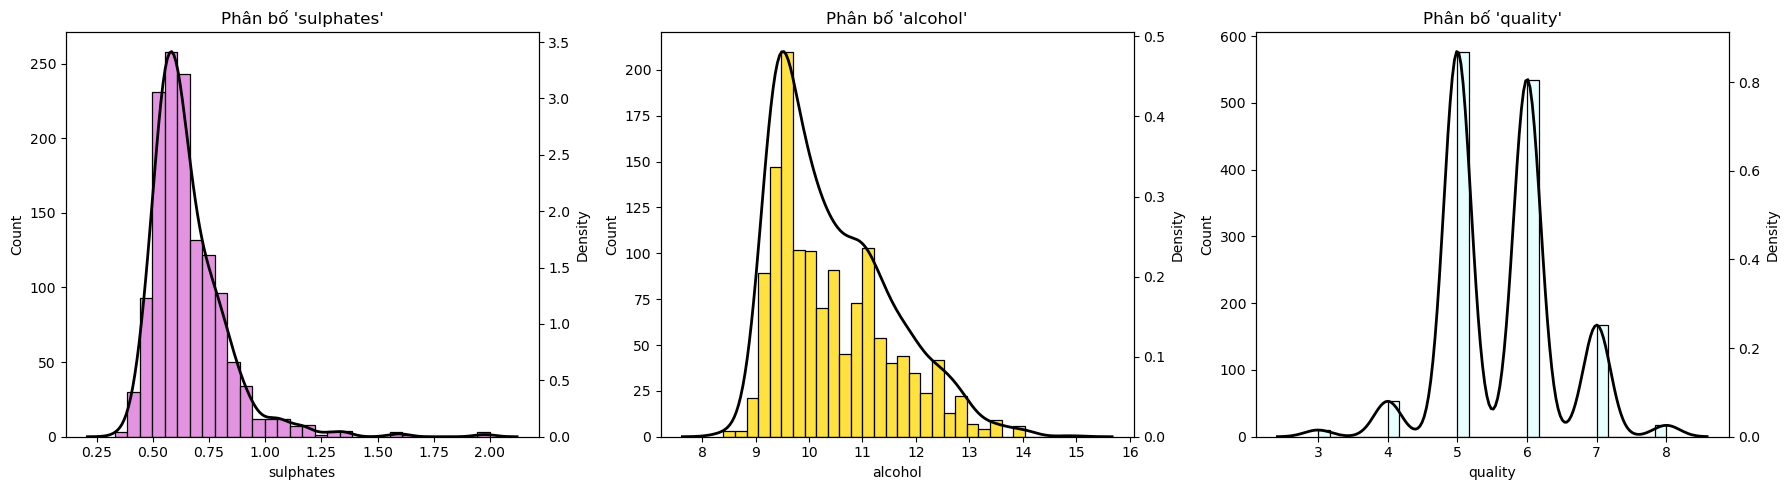

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
features = ['sulphates', 'alcohol', 'quality']
colors = ['orchid', 'gold', 'lightcyan']

for ax, feature, color in zip(axes, features, colors):
    sns.histplot(wine_data[feature], bins=30, kde=False, color=color, ax=ax)
    ax2 = ax.twinx()
    sns.kdeplot(wine_data[feature], color='black', ax=ax2, linewidth=2)
    ax.set_title(f"Phân bố '{feature}'")
    ax.set_xlabel(feature)
    ax.set_ylabel("Count")
    ax2.set_ylabel("Density")

plt.tight_layout()
plt.show()


### Nhận xét phân bố tổng quát cho các thuộc tính sulphates, alcohol, quality

- **Sulphates**: Phân bố sulphates tập trung chủ yếu ở mức thấp (khoảng 0.5–0.7), với số lượng mẫu giảm dần khi giá trị tăng lên. Biểu đồ cho thấy phần lớn rượu vang đỏ có hàm lượng sulphates thấp, chỉ một số ít mẫu có giá trị cao hơn. Phân bố lệch phải nhẹ.

- **Alcohol**: Đa số giá trị alcohol tập trung quanh mức trung bình (~10–11), với phần lớn các mẫu nằm trong khoảng này. Số lượng mẫu giảm dần khi giá trị alcohol tăng hoặc giảm xa khỏi trung bình. Phân bố khá chuẩn, không quá lệch, phản ánh đặc điểm phổ biến của rượu vang đỏ.

- **Quality**: Phân bố quality có xu hướng tập trung ở các mức 5 và 6, với số lượng mẫu lớn nhất ở hai giá trị này. Số lượng mẫu giảm mạnh ở các mức chất lượng thấp hơn (3, 4) hoặc cao hơn (7, 8). Phân bố này cho thấy phần lớn rượu vang đỏ trong tập dữ liệu được đánh giá ở mức trung bình.

Nhìn chung, cả ba thuộc tính đều có xu hướng tập trung ở các giá trị phổ biến, sulphates và alcohol phân bố khá đều, còn quality tập trung mạnh ở mức trung bình. Điều này phản ánh đặc điểm hóa học và chất lượng phổ biến của rượu vang đỏ trong tập dữ liệu.

### 5.2. Phân tích đa tính chất

Ta sẽ phân tích mối tương quan giữa các thuộc tính, để thấy rõ sự tương đồng giữa các thuộc tính bộ dữ liệu

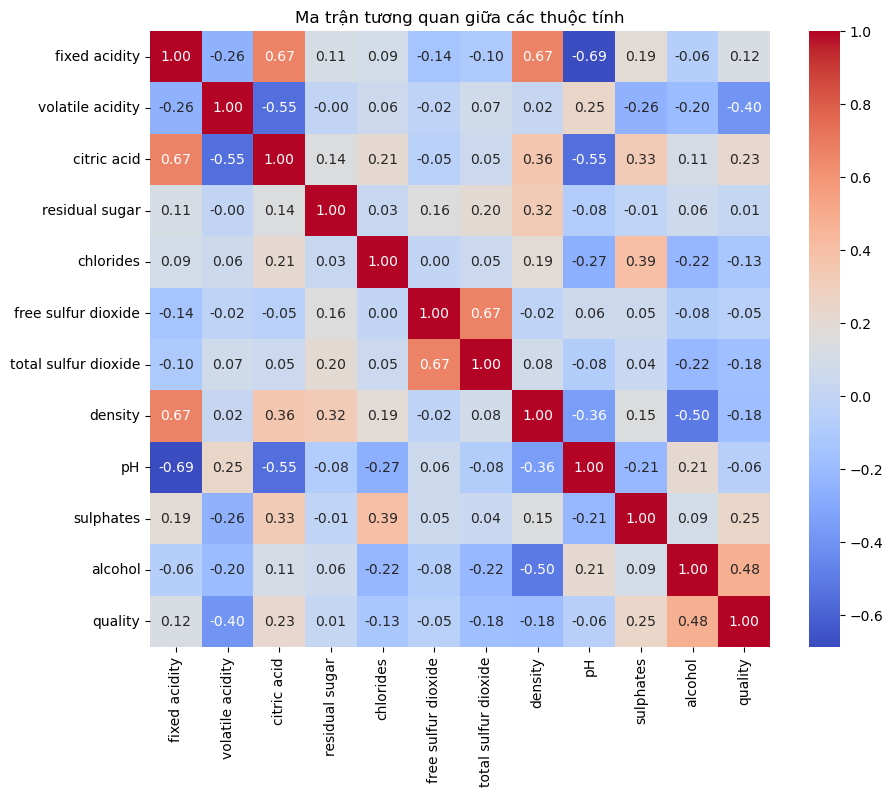

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Tính toán ma trận tương quan
corr = wine_data.corr()

# Vẽ heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Ma trận tương quan giữa các thuộc tính")
plt.show()


### Nhận xét về ma trận tương quan giữa các thuộc tính

- Một số thuộc tính có tương quan mạnh với nhau, ví dụ: **fixed acidity** và **citric acid** (0.67), **free sulfur dioxide** và **total sulfur dioxide** (0.67), **density** và **fixed acidity** (0.67).
- **Quality** có tương quan dương rõ rệt với **alcohol** (0.48) và **sulphates** (0.25), nhưng tương quan âm với **volatile acidity** (-0.40) và **density** (-0.18).
- Đa số các thuộc tính còn lại có mức tương quan thấp, cho thấy chúng đóng vai trò độc lập trong bộ dữ liệu.

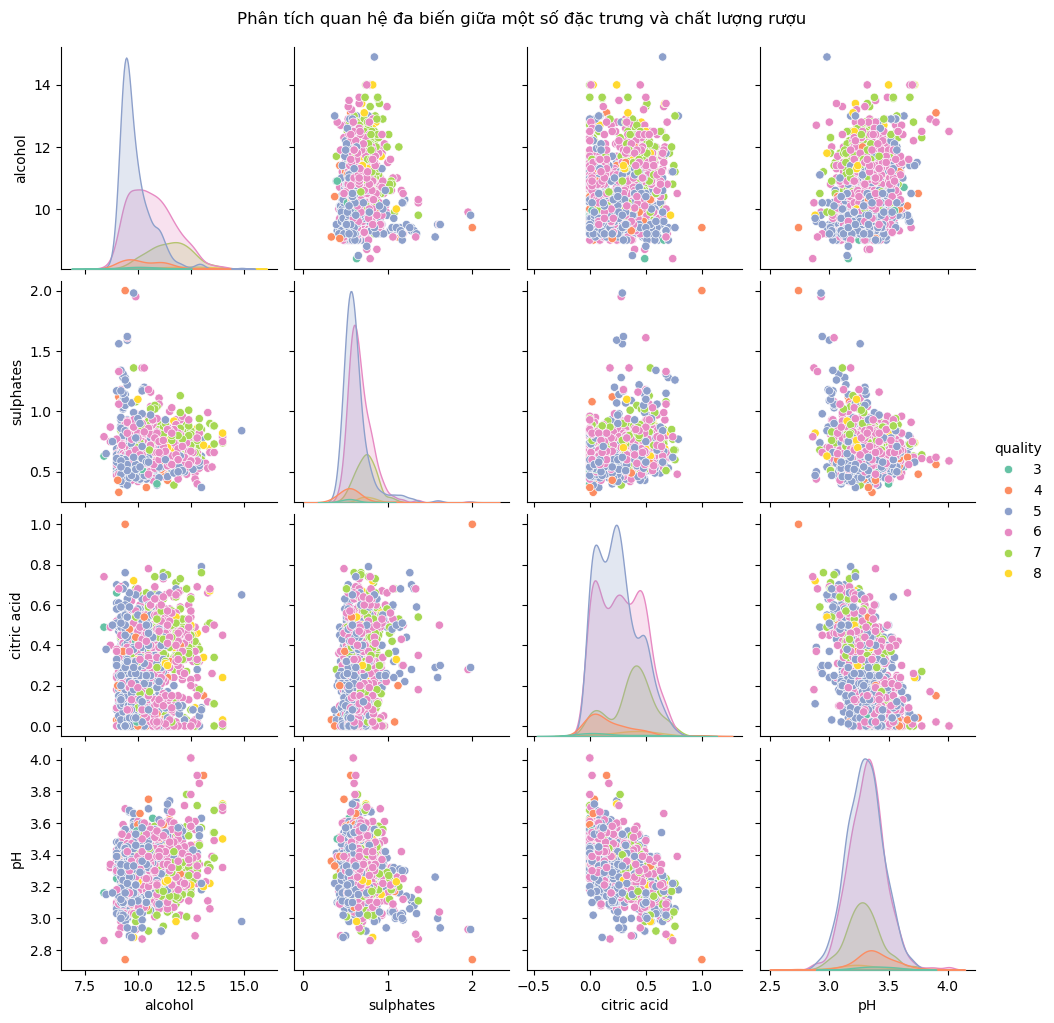

In [49]:
# Pairplot với biến mục tiêu 'quality'
sns.pairplot(wine_data, vars=["alcohol", "sulphates", "citric acid", "pH"], hue="quality", palette="Set2")
plt.suptitle("Phân tích quan hệ đa biến giữa một số đặc trưng và chất lượng rượu", y=1.02)
plt.show()


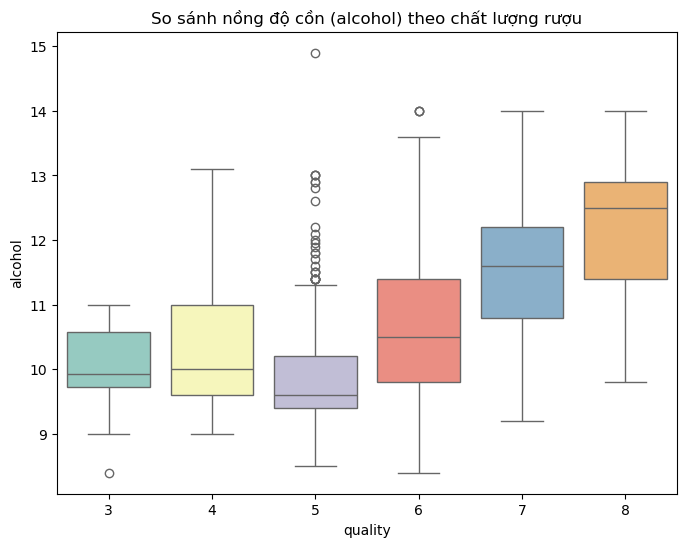

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.boxplot(x="quality", y="alcohol", data=wine_data, hue="quality", palette="Set3", legend=False)
plt.title("So sánh nồng độ cồn (alcohol) theo chất lượng rượu")
plt.show()


### Nhận xét về biểu đồ so sánh nồng độ cồn theo chất lượng rượu
Biểu đồ cho thấy nồng độ cồn có xu hướng tăng dần theo chất lượng rượu. Các mẫu rượu có chất lượng cao hơn thường có giá trị alcohol trung bình lớn hơn, trong khi các mẫu chất lượng thấp có nồng độ cồn thấp hơn. Điều này cho thấy mối liên hệ tích cực giữa nồng độ cồn và chất lượng rượu vang đỏ trong tập dữ liệu.

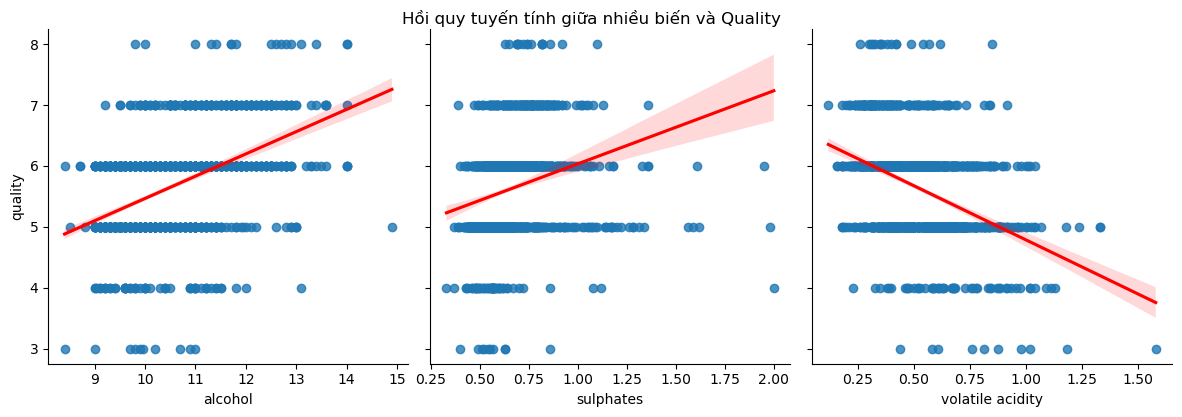

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(wine_data, x_vars=["alcohol", "sulphates", "volatile acidity"], 
             y_vars="quality", kind="reg", height=4, aspect=1, plot_kws={'line_kws':{'color':'red'}})
plt.suptitle("Hồi quy tuyến tính giữa nhiều biến và Quality", y=1.02)
plt.show()


## 6. Xử lý ngoại lai (Outliers)

Trước khi đến với bước này, ta cần nhìn nhận lại 1 chút về biểu đồ. Theo như thông tin dữ liệu có trên biểu đồ và các giá trị thống kê đã tính, ta nhận thấy 1 vài: một số cột có giá trị ngoại biên (outliers) khá lớn so với phần lớn dữ liệu. Cụ thể như sau:
* Residual sugar (đường còn lại): giá trị max = 15.5 trong khi 75% dữ liệu ≤ 2.6.
* Chlorides (hàm lượng muối): max = 0.611 trong khi 75% dữ liệu ≤ 0.09.
* Total sulfur dioxide: max = 289, nhưng 75% dữ liệu ≤ 62.
* Alcohol: dao động từ 8.4 → 14.9, khá rộng.
* Quality: nằm trong khoảng 3 → 8, không có giá trị ngoài phạm vi mong đợi.

Dựa vào thông tin trên, chúng ta sẽ bắt đầu xử lý ngoại lai cho các bộ dữ liệu này.

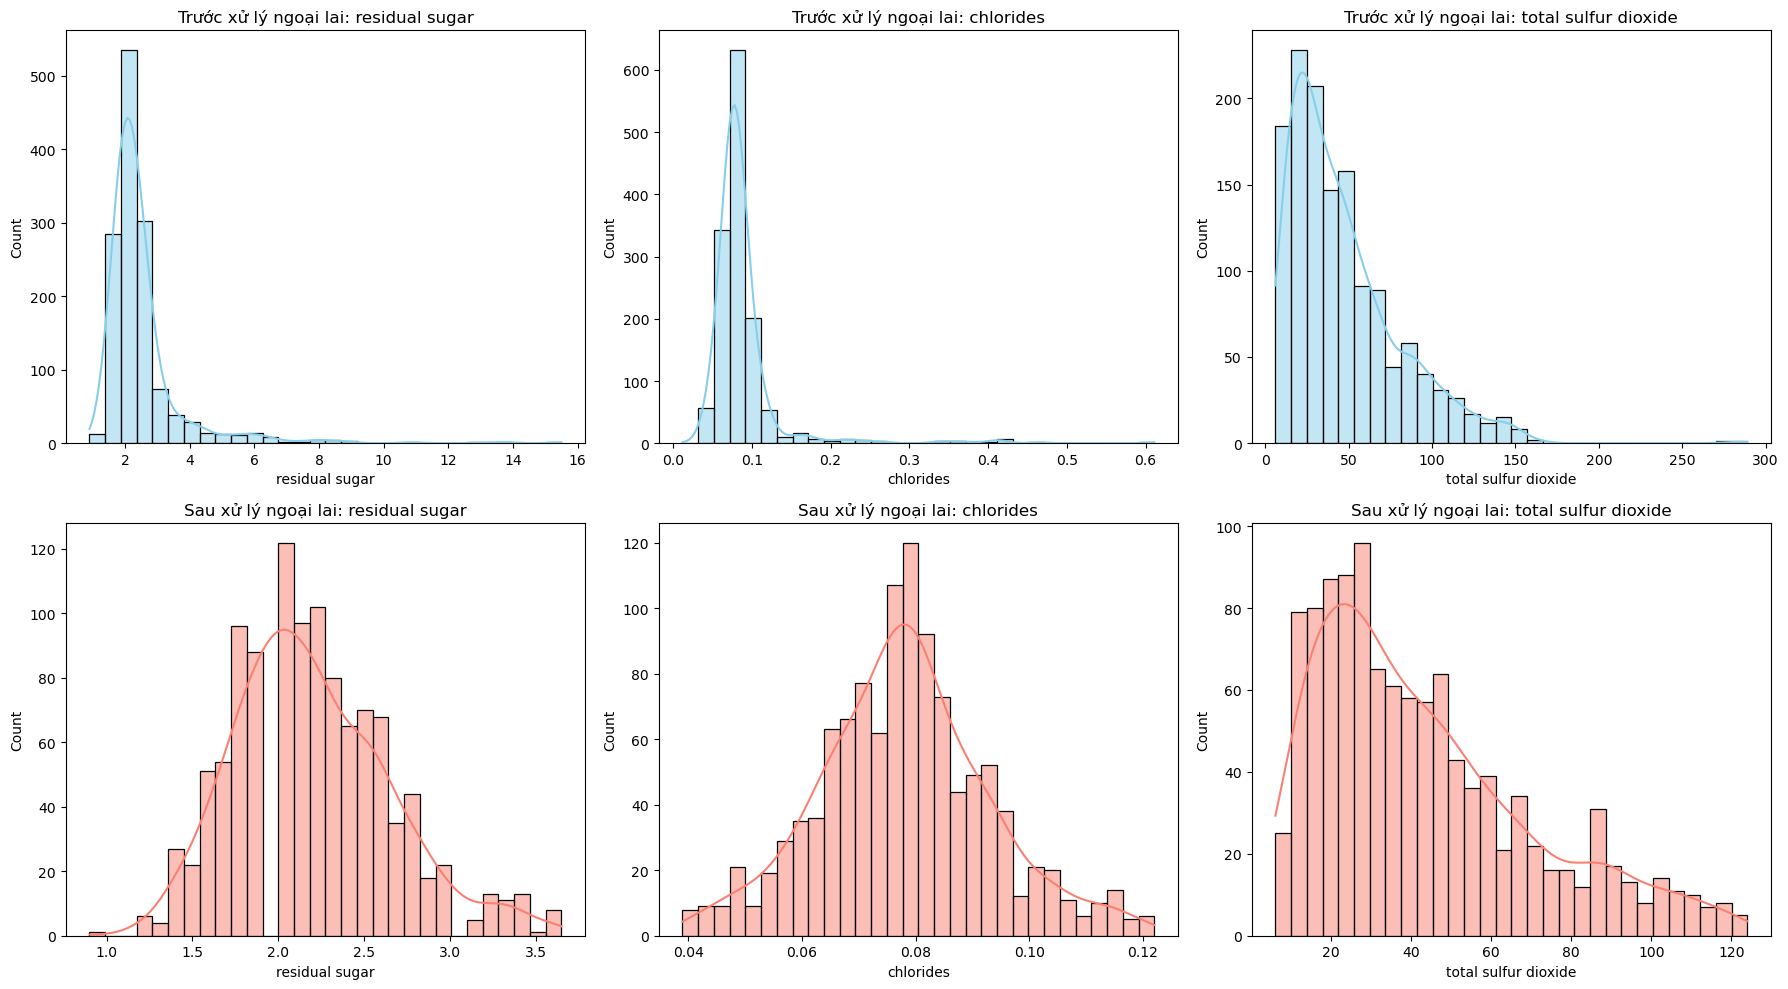

In [48]:
# Định nghĩa lại danh sách các thuộc tính xử lý ngoại lai nếu chưa có
outlier_features = ['residual sugar', 'chlorides', 'total sulfur dioxide']

# Tạo bản sao dữ liệu đã loại bỏ ngoại lai
wine_data_outlier_removed = wine_data.copy()
for feature in outlier_features:
    Q1 = wine_data[feature].quantile(0.25)
    Q3 = wine_data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    wine_data_outlier_removed = wine_data_outlier_removed[
        (wine_data_outlier_removed[feature] >= lower_bound) & 
        (wine_data_outlier_removed[feature] <= upper_bound)
    ]

# So sánh phân bố trước và sau khi xử lý ngoại lai
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
for i, feature in enumerate(outlier_features):
    # Trước xử lý
    sns.histplot(wine_data[feature], bins=30, kde=True, color='skyblue', ax=axes[0, i])
    axes[0, i].set_title(f"Trước xử lý ngoại lai: {feature}")
    # Sau xử lý
    sns.histplot(wine_data_outlier_removed[feature], bins=30, kde=True, color='salmon', ax=axes[1, i])
    axes[1, i].set_title(f"Sau xử lý ngoại lai: {feature}")

plt.tight_layout()
plt.show()


### So sánh dữ liệu trước và sau khi xử lý ngoại lai

Sau khi loại bỏ các giá trị ngoại lai ở các thuộc tính **residual sugar**, **chlorides** và **total sulfur dioxide**, số lượng mẫu dữ liệu giảm từ **1359** xuống còn **1123**. Phân bố của các thuộc tính này trở nên tập trung hơn quanh giá trị phổ biến, loại bỏ các mẫu có giá trị quá lớn hoặc quá nhỏ so với phần lớn dữ liệu. Điều này giúp bộ dữ liệu phản ánh chính xác hơn đặc điểm chung của rượu vang đỏ, giảm ảnh hưởng của các mẫu bất thường và hỗ trợ các phân tích tiếp theo đạt kết quả tin cậy hơn.

### Kết luận quá trình xử lý ngoại lai

Việc xử lý ngoại lai đã giúp loại bỏ các mẫu có giá trị bất thường ở các thuộc tính residual sugar, chlorides và total sulfur dioxide, làm giảm số lượng mẫu từ 1359 xuống còn 1123. Sau khi loại bỏ ngoại lai, phân bố dữ liệu trở nên tập trung hơn quanh các giá trị phổ biến, phản ánh đặc điểm chung của rượu vang đỏ một cách chính xác hơn. Điều này giúp giảm ảnh hưởng của các mẫu bất thường, tăng độ tin cậy cho các phân tích và mô hình dự đoán tiếp theo.

## Kết thúc